<a href="https://colab.research.google.com/github/MilanSinghBisht/collab-works/blob/main/OPTIMZERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRAINING A NEURAL NETWORK WITH DIFFERENT OPTIMIZERS

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with SGD optimizer...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7245 - loss: 1.0559 - val_accuracy: 0.9040 - val_loss: 0.3580
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9012 - loss: 0.3550 - val_accuracy: 0.9200 - val_loss: 0.2901
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9185 - loss: 0.2949 - val_accuracy: 0.9288 - val_loss: 0.2572
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9275 - loss: 0.2615 - val_accuracy: 0.9327 - val_loss: 0.2337
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9345 - loss: 0.2332 - val_accuracy: 0.9400 - val_loss: 0.2150

Training with Momentum optimizer...

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8514 - loss: 0.5059 - val_accuracy: 0.9527 - val_loss: 0.1648
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9549 - loss: 0.1594 - val_accuracy: 0.9643 - val_loss: 0.1161
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc

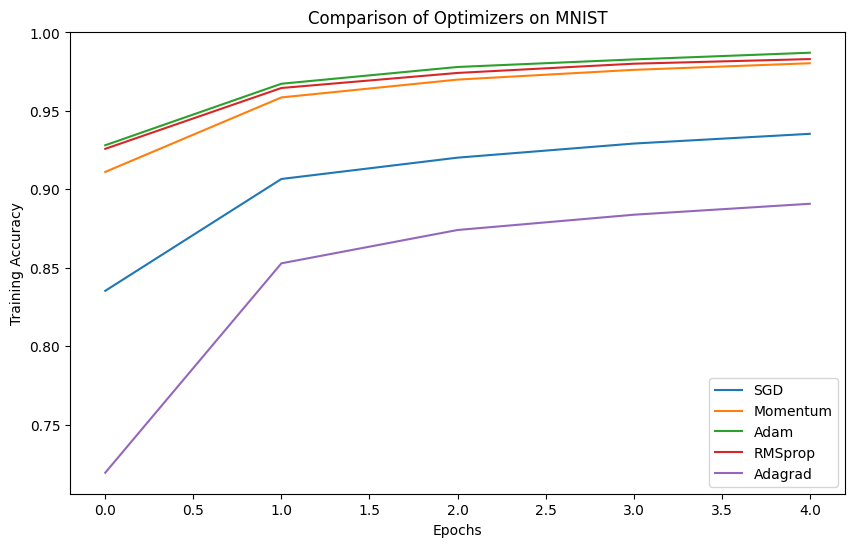

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the images (scale pixel values to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple neural network model
def create_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
        keras.layers.Dense(128, activation='relu'),  # Fully connected layer
        keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
    ])
    return model

# List of optimizers to test
optimizers = {
    "SGD": tf.keras.optimizers.SGD(),
    "Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "Adam": tf.keras.optimizers.Adam(),
    "RMSprop": tf.keras.optimizers.RMSprop(),
    "Adagrad": tf.keras.optimizers.Adagrad()
}

# Train models using different optimizers and compare performance
history_dict = {}

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...\n")
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)
    history_dict[name] = history.history  # Store training history

# Plot training accuracy for different optimizers
plt.figure(figsize=(10, 6))
for name, history in history_dict.items():
    plt.plot(history["accuracy"], label=name)

plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.legend()
plt.title("Comparison of Optimizers on MNIST")
plt.show()
